<a href="https://colab.research.google.com/github/Snow456/WeatherBot/blob/main/%D0%91%D0%BE%D1%82.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pyTelegramBotAPI
# !pip install translate

In [ ]:
import json
import telebot
import requests
import matplotlib.pyplot as plt

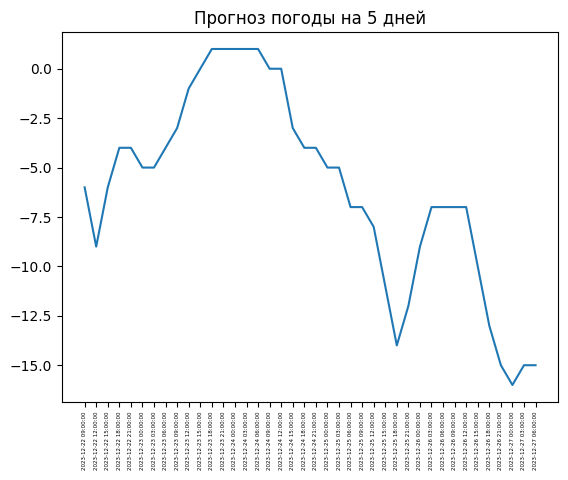

In [ ]:
bot=telebot.TeleBot('6445208632:AAGHPj_n_Kw9Ize2mBFn_0dTlNA-aAfRVTU')
API='96535cac42ce236dd53738427a533d26'

@bot.message_handler(commands=['start'])
def start(message):
    bot.send_message(message.chat.id, 'Здравствуйте! Вас приветствует бот. В каком городе вы хотите узнать погоду?')

@bot.message_handler(content_types=['text'])
def get_weather(message):
    city = message.text.strip().lower()
    res = requests.get(f'https://api.openweathermap.org/data/2.5/weather?q={city}&appid={API}&units=metric&lang=ru')
    res_dat=requests.get(f'https://api.openweathermap.org/data/2.5/forecast?q={city}&appid={API}&units=metric&lang=ru')
    temperatur=[]
    dats=[]
    if res.status_code == 200:
        data = json.loads(res.text)
        temp = data["main"]["temp"]
        temperature_feels = round(data['main']['feels_like'])
        weat=data['weather'][0]['description']
        wind=data["wind"]["speed"]
        bot.reply_to(message, f'Сейчас погода: {weat}. \n Температура: {temp} \u2103. \n Ощущается как: {temperature_feels} \u2103. \n Скорость ветра: {wind} м/с.')
        data_weather=res_dat.json()
        for i in data_weather['list']:
          temperatur.append(int('{0:+3.0f}'.format(i['main']['temp'])))
          dats.append(i['dt_txt'])
        plt.plot (dats, temperatur)
        plt.xticks(fontsize=4, rotation=90)
        plt.title("Прогноз погоды на 5 дней")
        plt.savefig('graf.png')
        graf = 'graf.png'
        file = open('./' + graf, 'rb')
        bot.send_photo(message.chat.id, file)
    else:
        bot.reply_to(message, f'Город указан не верно')
bot.polling(none_stop=True)